# The Sparks Foundation - Data Science & Business Analytics Internship

## GRIP @ The Sparks Foundation

### By : Tirthankar Sarkar 

## TASK 2 - Prediction using Unsupervised Machine Learning

In this task, we require to predict the optimum number of clusters for the iris data set using Unsupervised machine learning

## Steps :

<ul>
<li>Import libraries</li>
<li>Read the data</li>
<li>Explore the data</li>
<li>Find the optimal number of clusters</li>
<li>Bulid the model using K_means</li>
<li>Visualising the clusters</li>
</ul>

## Import libraties


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data from csv file

In [3]:
df = pd.read_csv('Iris.xls')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

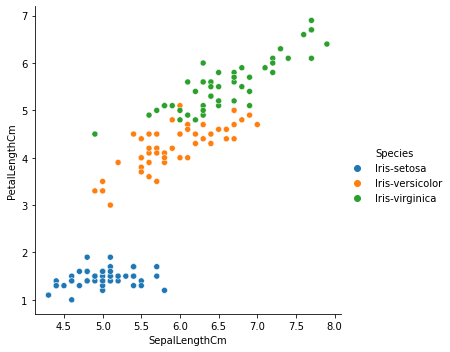

In [9]:
sns.relplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df)

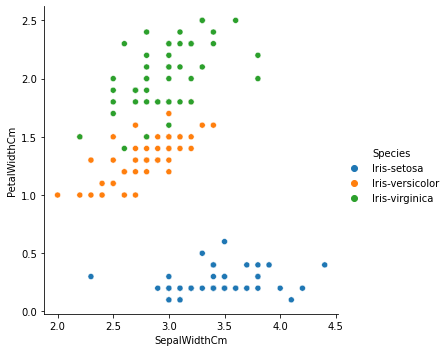

In [10]:
sns.relplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df)

In [11]:
data = df
Iris_df = data.drop(columns= ['Species' ,'Id'] )

In [12]:
Iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Find the optimal number of clusters

Text(0, 0.5, 'Within-cluster Sum of Squares')

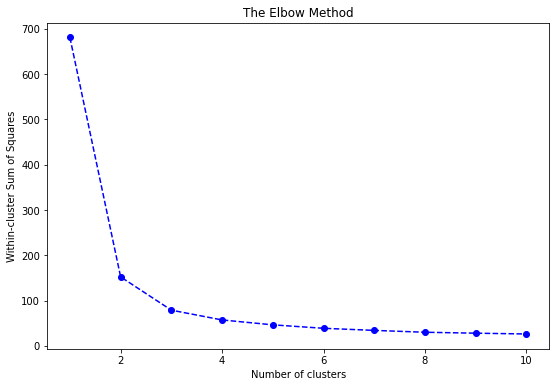

In [47]:
from sklearn.cluster import KMeans
plt.figure(figsize=(9,6))
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(Iris_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss,'bo--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Bulid the model using K_means

In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(Iris_df)
print(model.inertia_)

78.94084142614601


## Visualising the clusters

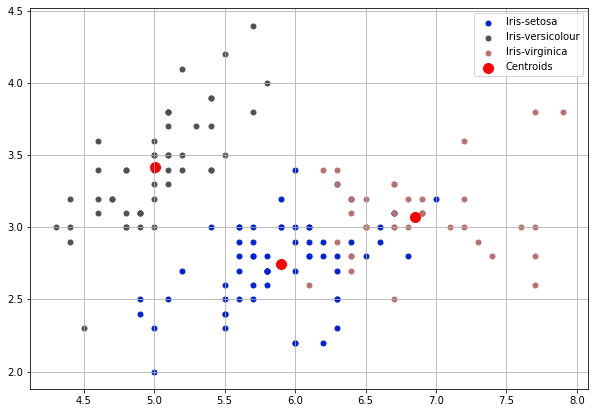

In [51]:
plt.figure(figsize=(10,7))
X = Iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 25, c = '#0021DA', label = 'Iris-setosa')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 25, c = '#515151', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s = 25, c = '#B87171', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()